# Lecture 3

## Outline of topics for this lecture:

1. Finishing lecture items from previous.
2. Talk about the field capacity problem.
3. More data wrangling on USDA NASS data.
4. Chutes and Laddders Game


## In lab later on the assigned work is:

1. Write a simple character, word, and line count function ...
2. Make a two-player chutes and ladders game ...

## Some useful background material:

The <a href="https://the-examples-book.com/book/introduction" target="_blank">Purdue Data Mine Examples Book</a> contains many useful chapters on data science. While they have not been directly designed for this class, they may be useful. You will not need to use scholar to perform the exercises of this class so don't worry about that part. Here is a direct link to the <a href="https://the-examples-book.com/book/python/introduction" target="_blank">Python chapter.</a>


Additional useful links for Python include:

<a href="https://docs.python.org/3/" target="_blank">Python 3.9.4 documentation</a>

The <a href="https://pypi.org/" target="_blank">Python Package Index</a> (This contains many of the useful Python "add-on" packages such as the math package)

The <a href="https://numpy.org/" target="_blank">Numpy Package</a> (This contains specialized array (vector and matrix) routines. Numpy stands for "Numerical Python")

United States Department of Agriculture: <a href="https://quickstats.nass.usda.gov/" target="_blank">Quick Stats</a> (The USDA's National Ag Statistics Service -- go here and familiarize yourself with the available data)

In [10]:
# Import packages ...
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

## Field Capacity Problem

The formula for field capacity is C = S*W*E/8.25 where the units of C are acres/hour and
* S = tractor speed in mph
* W = width of implement in feet
* E = efficiency of swath (a fraction between 0 and 1)

Let `E = 0.85`.

Let `S` range from 3 to 7 in 0.5 mph increments

Let `W` range from 10 to 60 in 10 foot increments

Code a capacity estimator using a nested set of `for` loops and the print command. You might want to try using `f-strings` to format a decent looking table.

## Catching up with previous lecture!

### Let's look at a more complicated scenario ...

The choices on the USDA NASS webpage that result in the `csv` below are:

<img align="left" src='Figs/USDA-NASS-screen-shot--landvalues.png' width="700"/>

In [11]:
# Put the file name into a str variable for convenience
file_name = 'Data/US-LandValue-by-State-and-Year.csv'

# Open the file for reading only and print the first few 
# lines.

fin = open(file_name, "r")

for i in range(20):
    line = fin.readline()
    print(line, end='')

fin.close()

"Program","Year","Period","Week Ending","Geo Level","State","State ANSI","Ag District","Ag District Code","County","County ANSI","Zip Code","Region","watershed_code","Watershed","Commodity","Data Item","Domain","Domain Category","Value","CV (%)"
"SURVEY","2021","YEAR","","STATE","ARKANSAS","05","","","","","","","00000000","","AG LAND","AG LAND, CROPLAND, NON-IRRIGATED - ASSET VALUE, MEASURED IN $ / ACRE","TOTAL","NOT SPECIFIED","2,130",""
"SURVEY","2021","YEAR","","STATE","CALIFORNIA","06","","","","","","","00000000","","AG LAND","AG LAND, CROPLAND, NON-IRRIGATED - ASSET VALUE, MEASURED IN $ / ACRE","TOTAL","NOT SPECIFIED","5,900",""
"SURVEY","2021","YEAR","","STATE","COLORADO","08","","","","","","","00000000","","AG LAND","AG LAND, CROPLAND, NON-IRRIGATED - ASSET VALUE, MEASURED IN $ / ACRE","TOTAL","NOT SPECIFIED","1,400",""
"SURVEY","2021","YEAR","","STATE","FLORIDA","12","","","","","","","00000000","","AG LAND","AG LAND, CROPLAND, NON-IRRIGATED - ASSET VALUE, MEASURED IN $ / AC

### The situation here is clearly more complicated than what we've before seen ...

Let's look at the header and a representative data line separately

In [12]:
fin = open(file_name, "r")

headerline = fin.readline()
dataline = fin.readline()

fin.close()

In [13]:
headerline

'"Program","Year","Period","Week Ending","Geo Level","State","State ANSI","Ag District","Ag District Code","County","County ANSI","Zip Code","Region","watershed_code","Watershed","Commodity","Data Item","Domain","Domain Category","Value","CV (%)"\n'

In [14]:
dataline

'"SURVEY","2021","YEAR","","STATE","ARKANSAS","05","","","","","","","00000000","","AG LAND","AG LAND, CROPLAND, NON-IRRIGATED - ASSET VALUE, MEASURED IN $ / ACRE","TOTAL","NOT SPECIFIED","2,130",""\n'

### Looking at these we see ...

* There are many columns that are superfluous for our application. We want to look at the trends over time of the values of ag land and attempt to correlate with corn productivity.

* To this end the columns of interest are `Year`, `State`, and `Value` since we already know the context

* We also note that comma can appear in the data both in the text string under the "Data Item" column and in the "Value" column. So we don't want to simply split on comma as it will create false columns. One thing we could do is to split on `","` and use the fact that they've put these superfluous double quotes on the lines.

Let's try it with `dataline` ...

In [15]:
# Experimenting with split method for finding the data we want ...

dataline.split('","')

['"SURVEY',
 '2021',
 'YEAR',
 '',
 'STATE',
 'ARKANSAS',
 '05',
 '',
 '',
 '',
 '',
 '',
 '',
 '00000000',
 '',
 'AG LAND',
 'AG LAND, CROPLAND, NON-IRRIGATED - ASSET VALUE, MEASURED IN $ / ACRE',
 'TOTAL',
 'NOT SPECIFIED',
 '2,130',
 '"\n']

In [16]:
# The year field is in positon 1 of the list ...

dataline.split('","')[1]

'2021'

In [17]:
# The state field is in positon 5 of the list ...

dataline.split('","')[5]

'ARKANSAS'

In [18]:
# The value field is in positon 19 of the list ...

dataline.split('","')[19]

'2,130'

In [19]:
# Can we convert this number to a float?

float(dataline.split('","')[19])

ValueError: could not convert string to float: '2,130'

In [20]:
# We can but the float() function does not like the comma in the string. So we first
# remove it and then call float ...

dataline.split('","')[19].replace(',','')

'2130'

In [21]:
# Now call float() and it works!!

float(dataline.split('","')[19].replace(',',''))

2130.0

In [22]:
# Let's pull land values data out for some states of interest ... COLORADO, ARKANSAS, KANSAS

In [23]:
# Put the file name into a str variable for convenience
file_name = 'Data/US-LandValue-by-State-and-Year.csv'

# Open the file for reading only and print the first few 
# lines.

fin = open(file_name, "r")
fin.readline() #Read first line to move past header

d_ark = np.array([])
v_ark = np.array([])
d_col = np.array([])
v_col = np.array([])
d_kan = np.array([])
v_kan = np.array([])

for line in fin:
    templist = line.split('","')
    state = templist[5]
    if state == 'ARKANSAS':
        d_ark = np.append(d_ark, float(templist[1]))
        v_ark = np.append(v_ark, float(templist[19].replace(',','')))
    elif state == 'COLORADO':
        d_col = np.append(d_col, float(templist[1]))
        v_col = np.append(v_col, float(templist[19].replace(',','')))
    elif state == 'KANSAS':
        d_kan = np.append(d_kan, float(templist[1]))
        v_kan = np.append(v_kan, float(templist[19].replace(',','')))
        
fin.close()

In [24]:
d_ark

array([2021., 2020., 2019., 2018., 2017., 2016., 2015., 2014., 2013.,
       2012., 2011., 2010., 2009., 2008., 2007., 2006., 2005., 2004.,
       2003., 2002., 2001., 2000., 1999., 1998., 1997.])

In [25]:
v_kan

array([2250., 1970., 2050., 1960., 1910., 1970., 2110., 2160., 1840.,
       1590., 1290., 1060.,  981.,  980.,  880.,  820.,  770.,  650.,
        645.,  640.,  635.,  630.,  625.,  620.,  615.])

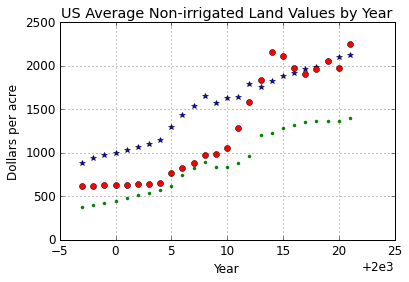

In [26]:
# Plotting the land value trends on the same axes
fig = plt.figure()
plt.style.use('classic')
plt.plot(d_ark, v_ark, '*')
plt.title("US Average Non-irrigated Land Values by Year")
plt.xlabel("Year")
plt.ylabel("Dollars per acre")
plt.grid()
plt.plot(d_col, v_col, '.')
plt.plot(d_kan, v_kan, 'o')

### Some homework ...

The x-axis in the plot above if very annoying. How can we fix this to simply show the years directly?

Why is there no data in the `csv` file for land values for Indiana and Alabama? Can we go back to NASS and find it?

## The Chutes and Ladders Game ...

Prof. Buckmaster introduced the chutes and ladders game as an example of computing using Excel. The typical game board, containing 100 squares, is shown below.

<img align="left" src='Figs/Chutes&LaddersImage.png' width="300"/>

### Short version of the rules:

1. Assume there are N players, who have been ordered according to the order in which they will play by some random means (e.g., by rolling the dice, drawing straws, etc.)

2. Players all start at position 0.

3. At time k (k = 0, 1, 2, ...) the positions of the N players are indicated by p_n(k) for n = 1, 2, 3, ..., N.

4. Starting with player 1, each player throws a die and adds the value shown on the die to his position, i.e., p_1(k+1) = p_1(k) + {the roll of the die}. Then the player moves to that position on the board. If there is no chute or ladder at the new position, he remains there and his turn ends. On the other hand, if there is a chute or a ladder at the new position, the player must climb the ladder or fall down the chute as the case may be .... this change then yields the new position.

5. The first player to reach position 100 exactly wins the game. If a player rolls the die and computes a new position that would take her past 100, then the roll is voided and she remains at her original position.

### Following is a function which rolls the die and computes the new position of a player.

In [4]:
import random
from random import Random

random.seed(a=None,version=2)

In [5]:
# This needs to be included for the random drawing of numbers from
# 1 to 6 simulating the throw of a die.
import random
from random import Random

random.seed(a=None,version=2)

# This dictionary stores the chutes and ladders board.
CandLTable = {1:38, 4:14, 9:31, 16:6, 21:42, 28:84, 36:44, 47:26, 49:11, 51:67,
             56:53, 63:19, 64:60, 71:91, 80:100, 87:24, 93:73, 95:75, 98:78}

# The function to make a move
def CandL_make_a_move(position,CandLTable):
    rand = Random(None)
    roll = rand.randint(1, 6)
    if position + roll > 100:
        return position
    position += roll
    position = CandLTable.get(position, position)
    return position

# HW Problem: Program Chutes and Ladders Game

Write a program which plays a game between two people until one wins and produces a record of the game play.

If you have time convert your single game code into a function and then write a program to play a large number of games one after another keeping a record of who won and how long the game lasted. Then compute statistics and/or histograms.

Finally, if you still can't sleep explore how changes to the positions of chutes and ladders might change the game.

In [6]:
CandL_make_a_move(1,CandLTable)

7

In [7]:
CandL_make_a_move(3,CandLTable)

31

In [14]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import random
from random import Random

random.seed(a=None,version=2)

CandLTable = {1:38, 4:14, 9:31, 16:6, 21:42, 28:84, 26:44, 47:26, 49:11, 51:67,
              56:53, 63:19, 64:60, 71:91, 80:100, 87:24, 93:73, 95:75, 98:78}

def CandL_make_a_move(position,CandLTable):
    
    rand = Random(None)
    roll = rand.randint(1, 6)
    if position + roll > 100:
        return position
    position += roll
    position = CandLTable.get(position, position)
    return postion

def game(p1_score, p2_score):
    
    P1 = np.array([0])
    p1 = 0
    
    
    P2 = np.array([0])
    p2 = 0
    
    
    fig3 = plt.figure()
    plt.style.use('seaborn-dark-palette')
    plt.grid()
    
    while (p1 < 100 and p2 < 100):
        p1 = CandL_make_a_move(p1, CandLTable)
        P1 = np.append(P1,p1)
        p2 = CandL_make_a_move(p2, CandLTable)
        P2 = np.append(P2,p2)
        
        plt.plot(p1,'*')
        plt.plot(p2,'^')
        
    if p1 >=100:
        p1_score +=1
    if p2 >=100:
        p2_score +=1
        
    return p1_score, p2_score

def main():
    p1_score = 0
    p2_score = 0
    for i in range(10):
        p1_score, p2_score = game(p1_score, p2_score)
    print("Player 1 has won", p1_score, "games and Player 2 has won", p2_score, "Games")